Import Library

In [23]:
# Impor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Baca dataset retail_sales_dataset
df = pd.read_csv('/content/retail_sales_dataset.csv')

# Periksa data awal
print(df.head())



   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Month             1000 non-null   int32         
 10  Year              1000 non-null   int32         
 11  Total Spending    1000 non-null   int64         
dtypes: datetime64[ns](1), int32(2), int64(6), object(3)
memory usage: 86.1+ KB
None


In [26]:
# Buat kolom bulan dan tahun dari kolom Date
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


In [27]:
# Periksa apakah kolom telah ditambahkan dengan benar
print(df.head())
print(df[['Date', 'Month', 'Year']].head())


   Transaction ID       Date Customer ID  Gender  Age Product Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   
2               3 2023-01-13     CUST003    Male   50      Electronics   
3               4 2023-05-21     CUST004    Male   37         Clothing   
4               5 2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  Month  Year  
0         3              50           150     11  2023  
1         2             500          1000      2  2023  
2         1              30            30      1  2023  
3         1             500           500      5  2023  
4         2              50           100      5  2023  
        Date  Month  Year
0 2023-11-24     11  2023
1 2023-02-27      2  2023
2 2023-01-13      1  2023
3 2023-05-21      5  2023
4 2023-05-06      5  2023


In [4]:
# Hitung total pengeluaran per pelanggan
df['Total Spending'] = df['Quantity'] * df['Price per Unit']


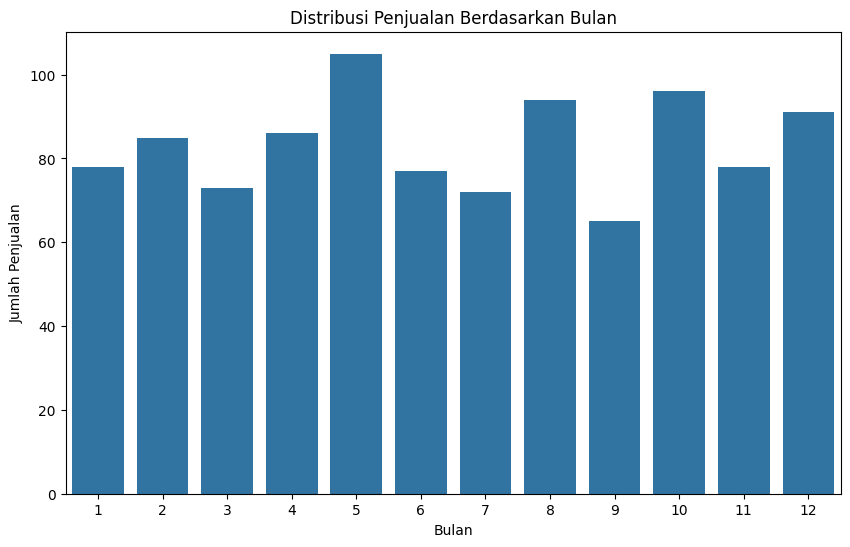

In [5]:
# Visualisasi Distribusi Penjualan Berdasarkan Bulan
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month')
plt.title('Distribusi Penjualan Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.show()

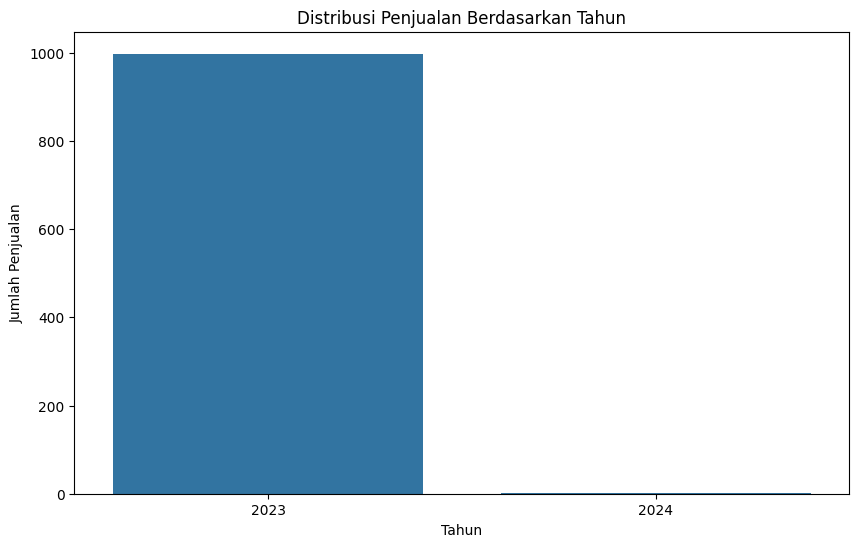

In [6]:
# Visualisasi Distribusi Penjualan Berdasarkan Tahun
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Year')
plt.title('Distribusi Penjualan Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penjualan')
plt.show()

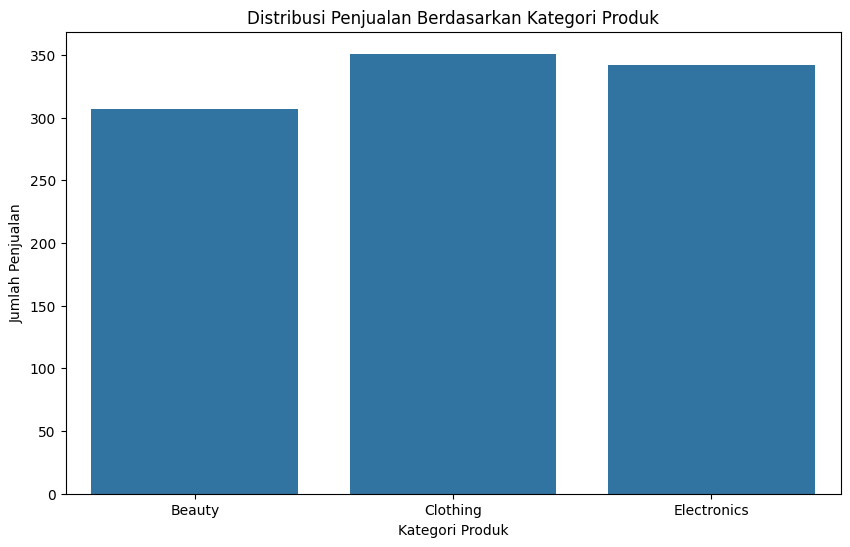

In [7]:
# Visualisasi Distribusi Penjualan Berdasarkan Kategori Produk
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product Category')
plt.title('Distribusi Penjualan Berdasarkan Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Penjualan')
plt.show()

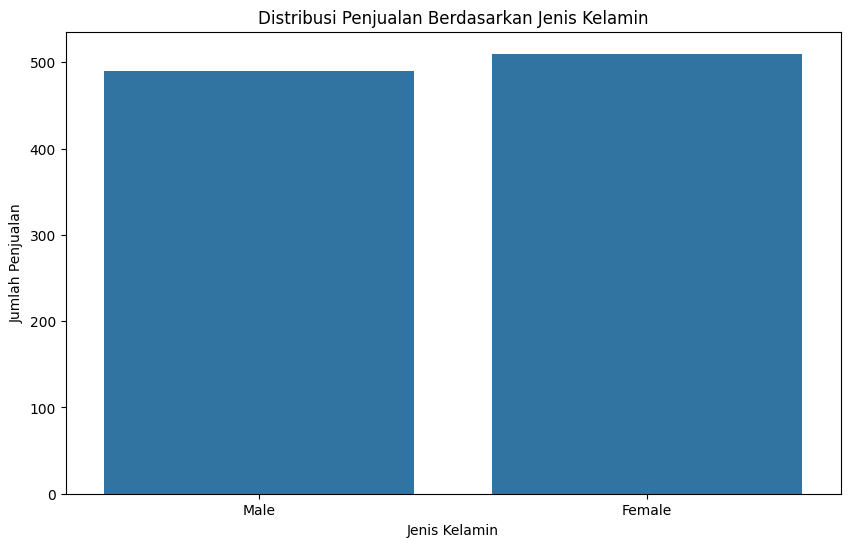

In [8]:
# Visualisasi Distribusi Penjualan Berdasarkan Jenis Kelamin
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender')
plt.title('Distribusi Penjualan Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Penjualan')
plt.show()

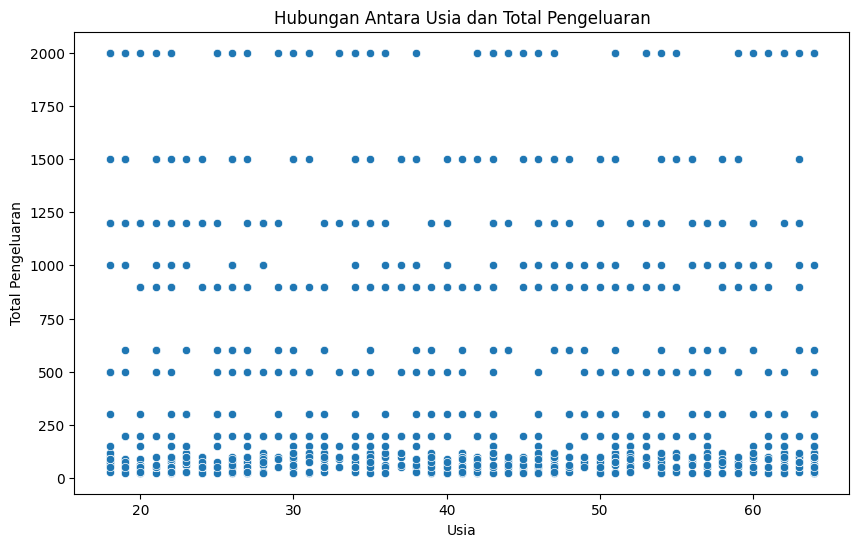

In [9]:
# Visualisasi Hubungan Antara Usia dan Total Pengeluaran
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Total Spending')
plt.title('Hubungan Antara Usia dan Total Pengeluaran')
plt.xlabel('Usia')
plt.ylabel('Total Pengeluaran')
plt.show()

In [10]:
# fitur-fitur yang akan digunakan untuk prediksi
X = df[['Month', 'Year', 'Gender', 'Age', 'Product Category', 'Total Spending']]
y = df['Total Amount']

In [11]:
# Encoding kategorikal variabel
X_encoded = pd.get_dummies(X, columns=['Gender', 'Product Category'], drop_first=True)


In [12]:
# Split data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [14]:
# Menginisialisasi dan Melatih Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Evaluasi Model
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2.7948407860668665e-25
R-squared: 1.0


In [16]:
from sklearn.model_selection import cross_val_score

# Lakukan validasi silang dengan 5-fold
scores = cross_val_score(model, X_encoded, y, cv=5, scoring='neg_mean_squared_error')
print(f'Mean Squared Error (CV): {-scores.mean()}')

Mean Squared Error (CV): 8.189471766219274e-26


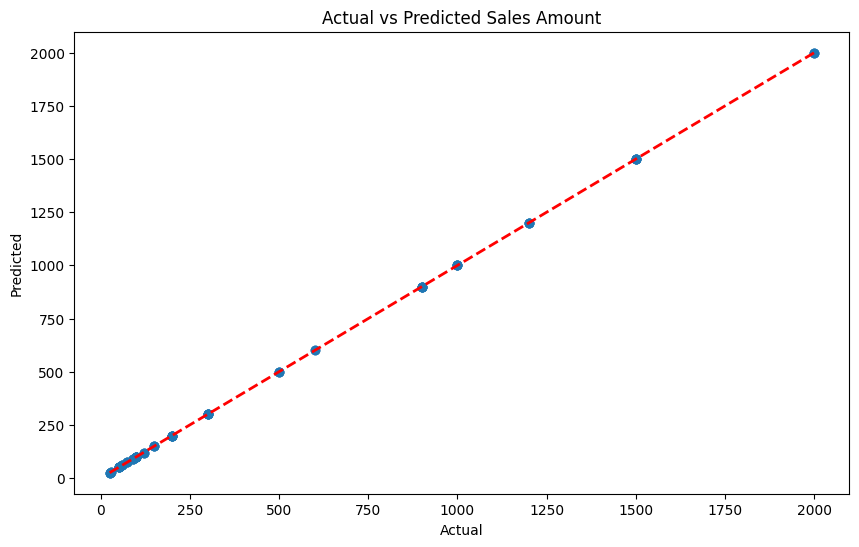

In [17]:
import matplotlib.pyplot as plt

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)

# Plot hasil prediksi vs nilai aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Sales Amount')
plt.show()


In [21]:
# Memprediksi Penjualan di Masa Depan
# Contoh data untuk prediksi masa depan
future_data = pd.DataFrame({
    'Month': [2],
    'Year': [2024],
    'Gender': ['Female'],
    'Age': [30],
    'Product Category': ['Beauty'],
    'Total Spending': [200]
})
future_data_encoded = pd.get_dummies(future_data, columns=['Gender', 'Product Category'], drop_first=True)
# Pastikan urutan kolom sama dengan data latih
for col in X_train.columns:
    if col not in future_data_encoded.columns:
        future_data_encoded[col] = 0

future_sales = model.predict(future_data_encoded)
print(f'Prediksi penjualan di bulan Februari 2024: {future_sales[0]}')

Prediksi penjualan di bulan Februari 2024: 199.99999999999983
